In [1]:
#!/usr/bin/env python
#coding=utf-8

## DBSCAN:

#### DBSCAN目的是找到密度相連對象的最大集合
<br>基於密度的聚類算法。與劃分和層次聚類方法不同，它將簇定義為密度相連的點的最大集合，能夠把具有足夠高密度的區域劃分為簇，並可在噪聲的空間數據庫中發現任意形狀的聚類。

### 算法優點：
1. 與K-means方法相比，DBSCAN不需要事先知道要形成的簇類的數量。

2. 與K-means方法相比，DBSCAN可以發現任意形狀的簇類。

3. 同時，DBSCAN能夠識別出噪聲點。對離群點有較好的魯棒性，甚至可以檢測離群點。 註：魯棒性，指系統在擾動或不確定的情況下仍能保持它們的特徵行為。

4. DBSCAN對於數據庫中樣本的順序不敏感，即Pattern的輸入順序對結果的影響不大。但是，對於處於簇類之間邊界樣本，可能會根據哪個簇類優先被探測到而其歸屬有所擺動。

5. DBSCAN被設計與數據庫一同使用，可以加速區域的查詢。例如 使用R*樹

### 缺點：
1. DBScan不能很好反映高維數據。

2. DBScan不能很好反映數據集以變化的密度。

3. 由於DBSCAN算法直接對整個數據集進行操作，並且在聚類之前需要建立相應的R*樹，並繪制k-dist圖，因此算法所需的內存空間和I/O消耗都相當可觀。在計算資源有限而數據量又非常龐大的情況下，DBSCAN算法的效率將受到很大影響。
<br>（DBSCAN算法將區域查詢得到的所有未被處理過的點都作為種子點，留待下一步擴展處理。對於大規模數據集中的較大類而言，這種策略會使種子點的數目不斷膨脹，算法所需的內存空間也會快速增加。）

4. 由於DBSCAN算法使用了全局性表征密度的參數，因此當各個類的密度不均勻，或類間的距離相差很大時，聚類的質量較差。
<br>（當各個類的密度不均勻、或類間的距離相差很大時，如果根據密度較高的類選取較小的Eps值，那麽密度相對較低的類中的對象Eps 鄰域中的點數將小Minpts，則這些點將會被錯當成邊界點，從而不被用於所在類的進一步擴展，因此導致密度較低的類被劃分成多個性質相似的類。與此相反，如果根據密度較低的類來選取較大的Eps值，則會導致離得較近而密度較大的類被合並，而它們之間的差異被忽略。所以在上述情況下，很難選取一個合適的全局Eps值來獲得比較準確的聚類結果。）

5. DBSCAN不是完全確定的，邊界點從不同的簇中獲得，可以使不同簇的一部分，取決於數據處理。

6. DBSCAN的質量取決於regionQuery(P,Eps)函數中距離的測量。最常用的距離度量是歐式距離，尤其是在高維數據中，由於所謂的維數災難，這種度量基本上是無用的，很難為E找到一個恰當的值。雖然目前有一些基於歐式距離的算法，但是如果不能對數據和規模有很好的了解，也很難找一個有意義的距離閾值E。

7. 當密度差異大時，由於選取的MinPts-Eps組合不能同時適合所有的簇，DBSACN不能很好的進行數據聚類。（缺點4）

8. 輸入參數敏感,確定參數Eps , MinPts困難 ,若選取不當 ,將造成聚類質量下降。

9. 由於經典的DBSCAN算法中參數Eps和MinPts在聚類過程中是不變的，使得該算法難以適應密度不均勻的數據集。

### 算法改進：

請詳見參考資料。

參考資料：
https://www.itread01.com/content/1497934934.html

##### sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)

#### 引數:

    1 eps(float, optional): 鄰域，較低的``eps''表示形成聚類所需的較高密度；
    2 min_samples(int, optional): 以核心點為半徑的鄰域內的樣本數量；
    3 metric(string, or callable): 樣本之間的距離度量,可使用自定義方法；
    4 metric_params=None(dict, optional): 度量函式的附加引數，0.19版本才出現；
    5 algorithm( {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional): 最近鄰模組使用的演算法,逐點計算距離以發現近鄰；
    6 leaf_size(int, optional (default = 30)): 'ball_tree'或'kd_tree'使用
    7 p(float, optional): 閔可夫斯基的冪，以計算點與點之間的距離;
    8 n_jobs(int, optional (default = 1)): 並行作業的數量。

#### 屬性:

    1 core_sample_indices_: 核心點序號，從0開始；
    2 components_: 核心點原始資料；
    3 labels_: 各樣本所屬的類別標號，-1為噪聲點。

#### 方法:

    1　fit(X[, y, sample_weight]): 對X執行DBSCAN聚類；
    2　fit_predict(X[, y, sample_weight]): 對X執行DBSCAN聚類，並返回類別號；
    3　get_params([deep]): 獲得演算法的引數；
    4　set_params(**params): 設定演算法的引數。
    
參考資料：

https://www.itread01.com/p/518873.html

In [1]:
# 能處理載入、整理與視覺化等常見的資料應用套件
import pandas as pd

# 資料視覺化
import matplotlib.pyplot as plt
%matplotlib inline

# 分群 DBSCAN
from sklearn.cluster import DBSCAN

# 以 matplotlib 為基礎建構的高階繪圖套件，讓使用者更加輕鬆地建立圖表，可視為是 matplotlib 的補強。
import seaborn as sns

# 能快速操作多重維度的陣列，具備平行處理的能力，可以將操作動作一次套用在大型陣列上。
import numpy as np

# 計算欄位內元素的頻度
from collections import Counter

# 載入、儲存圖片用
#from PIL import Image

# 用來處理文件和目錄
import os

In [2]:
os.getcwd()

'E:\\III\\III\\Workplace\\TopicProject\\DataProcessing'

#### 欄位名稱
品牌：Brand；
食物名：Name；
品牌+食物名：BraName；
食用量：Intake； 
熱量：Calories, Cal；
蛋白質：Protein； 
脂肪：Fat；
飽和脂肪：Saturated fatty acid, SF；
不飽和脂肪 as Unsaturated fat, USF；
多（元）飽和脂肪：Polyunsaturated fat, PUSF；
單（元）飽和脂肪：Monounsaturated fat, MUSF；
膽固醇：Total cholesterol, TC；
碳水化合物：Carbohydrate, CHO；
糖：Sugar； 
纖維：Fiber；
鈉：Na；
鉀：K；
資訊來源：Resource； 
更新時間：UpdateTime； 
反鏈脂肪：Trans fat,TF。

In [3]:
# 讀入 csv 文字檔
# 之前已經個資料庫檔案inner join的檔案
food_csv = "../Data/Food_Mixed2_test.csv"
dfi = pd.read_csv(food_csv, encoding='utf-8')

### 覽閱一下資料

In [4]:
dfi.head()

,Name,BraName,Intake_g,Cal_kcal,CHO_g,Fat_g,Protein_g,CHO_per,Fat_per,Protein_per,total_per
0,1％脂肪牛奶,_1％脂肪牛奶,1杯,102.0,12.18,2.37,8.22,53.491436,10.408432,36.100132,100.0
1,1％脂肪牛奶,_1％脂肪牛奶,1個（學生奶盒大小）（240 ml）,102.0,12.18,2.37,8.22,53.491436,10.408432,36.100132,100.0
2,1％脂肪牛奶,_1％脂肪牛奶,1份（244 g）,102.0,12.18,2.37,8.22,53.491436,10.408432,36.100132,100.0
3,1％脂肪牛奶,_1％脂肪牛奶,1標準一杯的份量，冷麥片,51.0,6.09,1.18,4.11,53.514938,10.369069,36.115993,100.0
4,1％脂肪牛奶,_1％脂肪牛奶,100 ml,43.0,5.15,1.00,3.48,53.478712,10.384216,36.137072,100.0


In [5]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24358 entries, 0 to 24357
Data columns (total 11 columns):
Name           24358 non-null object
BraName        24357 non-null object
Intake_g       24358 non-null object
Cal_kcal       24358 non-null float64
CHO_g          24358 non-null float64
Fat_g          24337 non-null float64
Protein_g      24349 non-null float64
CHO_per        24227 non-null float64
Fat_per        24227 non-null float64
Protein_per    24227 non-null float64
total_per      24227 non-null float64
dtypes: float64(8), object(3)
memory usage: 2.0+ MB


#### 刪除df_drink['BraName']重複值
```python
df = df.drop_duplicates(subset='BraName', keep='first') 
```
dataframe.drop_duplicates(subset='column', keep='first', inplace = False) 
<br>subset：以哪個欄位當主；keep：保留哪一值，{'first', 'last', 'False'（刪除所有重複）}, default 'first'；
<br>inplace : boolean, default False. Whether to drop duplicates in place or to return a copy

In [6]:
dfi = dfi.drop_duplicates(subset='BraName', keep='last') #取最後的，因為以官網為主，資料庫的資料為輔

#重整index
dfi = dfi.reset_index(drop=True)

dfi.head()

,Name,BraName,Intake_g,Cal_kcal,CHO_g,Fat_g,Protein_g,CHO_per,Fat_per,Protein_per,total_per
0,1％脂肪牛奶,_1％脂肪牛奶,1以30 ml為標準份量，飲料,1.0,0.12,0.02,0.08,54.545455,9.090909,36.363636,100.0
1,100％純楓樹糖漿,_100％純楓樹糖漿,1餐匙/湯匙,52.0,13.42,0.04,0.00,99.702823,0.297177,0.000000,100.0
2,100百份芒果味QQ糖,_100百份芒果味QQ糖,3 g,33.0,7.00,0.00,0.00,100.000000,0.000000,0.000000,100.0
3,17茶,_17茶,100 g,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN
4,2％脂肪牛奶,_2％脂肪牛奶,1以30 ml為標準份量，飲料,1.0,0.12,0.05,0.08,48.000000,20.000000,32.000000,100.0


#### 缺值補0
```python
df= df.fillna(0)
```

In [7]:
# 補遺漏值
dfi = dfi.fillna(0)
dfi.head()

,Name,BraName,Intake_g,Cal_kcal,CHO_g,Fat_g,Protein_g,CHO_per,Fat_per,Protein_per,total_per
0,1％脂肪牛奶,_1％脂肪牛奶,1以30 ml為標準份量，飲料,1.0,0.12,0.02,0.08,54.545455,9.090909,36.363636,100.0
1,100％純楓樹糖漿,_100％純楓樹糖漿,1餐匙/湯匙,52.0,13.42,0.04,0.00,99.702823,0.297177,0.000000,100.0
2,100百份芒果味QQ糖,_100百份芒果味QQ糖,3 g,33.0,7.00,0.00,0.00,100.000000,0.000000,0.000000,100.0
3,17茶,_17茶,100 g,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0
4,2％脂肪牛奶,_2％脂肪牛奶,1以30 ml為標準份量，飲料,1.0,0.12,0.05,0.08,48.000000,20.000000,32.000000,100.0


In [8]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12930 entries, 0 to 12929
Data columns (total 11 columns):
Name           12930 non-null object
BraName        12930 non-null object
Intake_g       12930 non-null object
Cal_kcal       12930 non-null float64
CHO_g          12930 non-null float64
Fat_g          12930 non-null float64
Protein_g      12930 non-null float64
CHO_per        12930 non-null float64
Fat_per        12930 non-null float64
Protein_per    12930 non-null float64
total_per      12930 non-null float64
dtypes: float64(8), object(3)
memory usage: 1.1+ MB


## DBSCAN

#### eps : float, optional
- 核心點（core point）的半徑，若2點很靠近且符合eps（在半徑內），則歸屬於同一群集。

#### min_samples : int, optional
- 一群中最少要有幾個資料點。

ε (eps) 和形成高密度區域所需要的最少點數 (minPts)，它由一個任意未被訪問的點開始，然後探索這個點的 ε-鄰域，如果 ε-鄰域裡有足夠的點，則建立一個新的聚類，否則這個點被標籤為雜音。注意這個點之後可能被發現在其它點的 ε-鄰域裡，而該 ε-鄰域可能有足夠的點，屆時這個點會被加入該聚類中。

參考資料：https://zh.wikipedia.org/wiki/DBSCAN

In [9]:
# 抽出欄，製作預之dataframe
df_k = dfi[['Protein_per','Fat_per', 'CHO_per']]
df_k.head()

,Protein_per,Fat_per,CHO_per
0,36.363636,9.090909,54.545455
1,0.000000,0.297177,99.702823
2,0.000000,0.000000,100.000000
3,0.000000,0.000000,0.000000
4,32.000000,20.000000,48.000000


In [10]:
db = DBSCAN(eps = 4, min_samples = 1).fit(df_k)
labels = db.labels_

Counter(labels)

Counter({0: 12830, 1: 97, 2: 3})

In [11]:
dfi["label"] = labels
dfi["label"].describe()

count    12930.000000
mean         0.007966
std          0.091472
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: label, dtype: float64

存檔變數區

In [12]:
param = 3
Stand = 'Percentage'
DBSN = 'eps = 4, minSamples = 1'
path = '..\\Output\\DataAnalysis_food_Clustering_DBSCAN_'

In [13]:
# 存一下檔
dfi.to_csv(path + Stand + '_' +  DBSN +  '_' + str(param)+'param' +'.csv', encoding='utf-8', index=False)

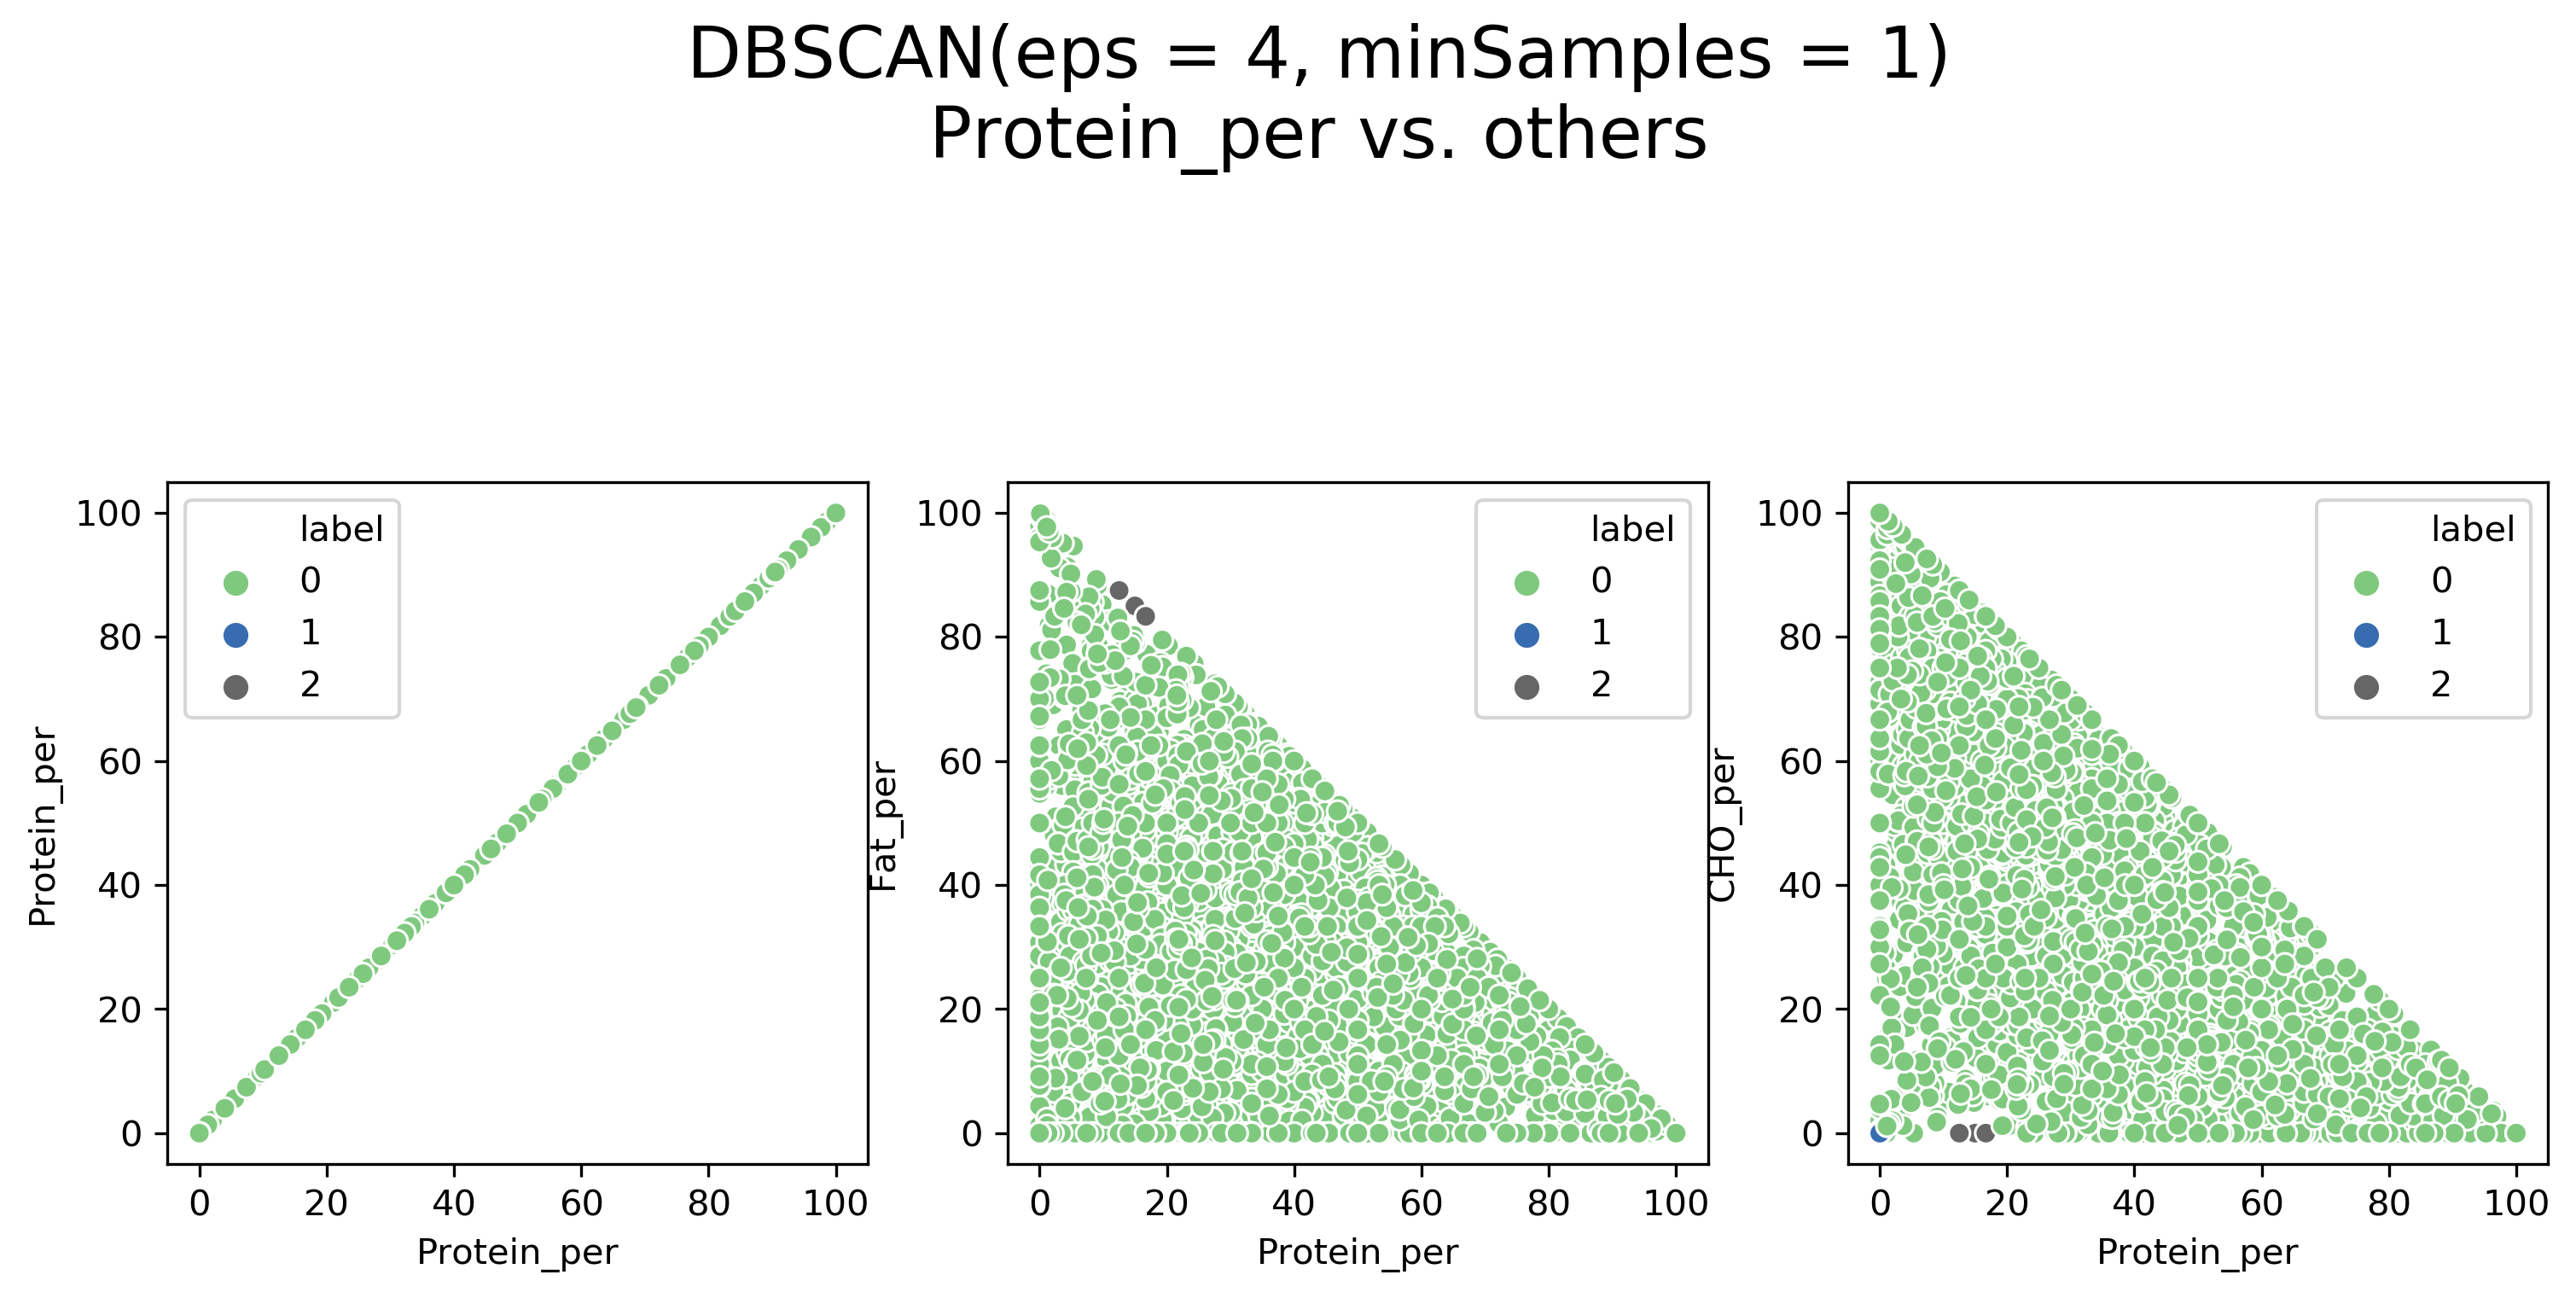

In [14]:
##Protein_per vs. others

title = 'Protein_per' 

a = "Protein_per"
b = "Fat_per"
c = "CHO_per"

# 制訂畫布
plt.figure(num=None, figsize=(12, 12), dpi=300, facecolor='w', edgecolor='k')

# 制訂畫布抬頭
plt.suptitle('DBSCAN(' + DBSN +")" + ('\n') + title + ' vs. others', ha = 'center', va = 'bottom',
                 fontsize=20)

# 子圖
plt.subplot(3,3,1)
sns.scatterplot(x=dfi[title],
                y=dfi[a],
                hue=dfi["label"], palette="Accent")
 
plt.subplot(3,3,2)
sns.scatterplot(x=dfi[title],
                y=dfi[b],
                hue=dfi["label"], palette="Accent")
 
plt.subplot(3,3,3)
sns.scatterplot(x=dfi[title],
                y=dfi[c],
                hue=dfi["label"], palette="Accent")

# 儲存圖片
plt.savefig(path + Stand + '_' +  DBSN +  '_' + str(param)+'param' + '_' + str(title) + 'VsOthers' +'.png', dpi=300, bbox_inches = 'tight')
plt.show()

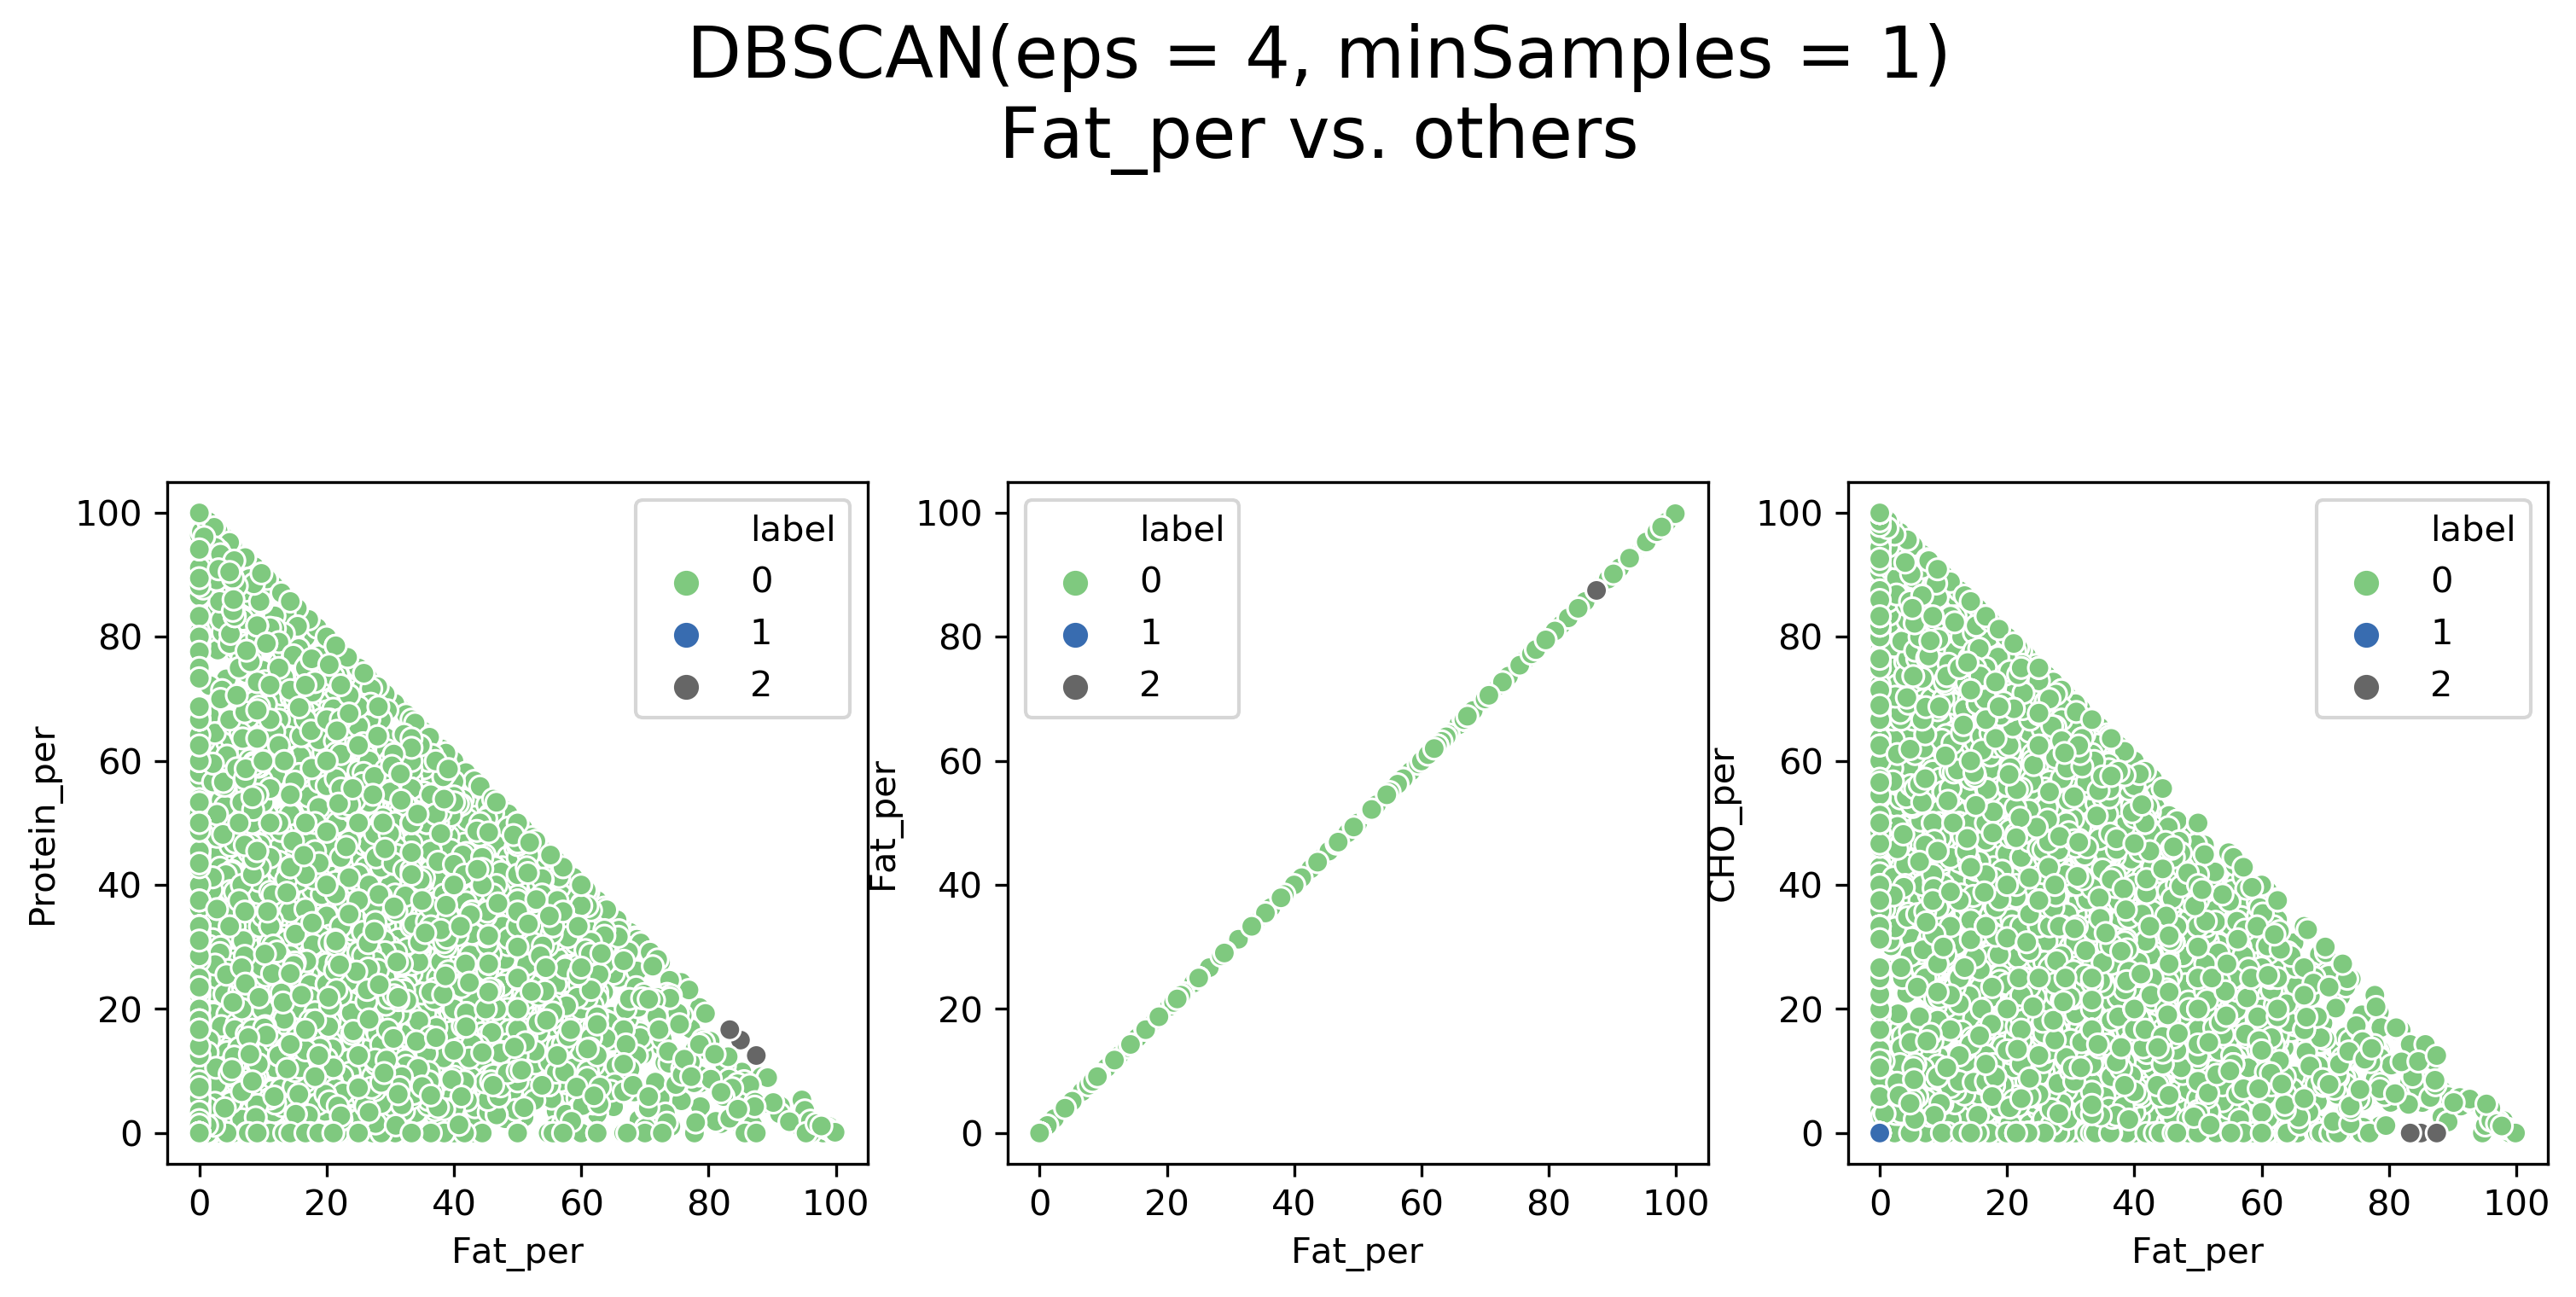

In [15]:
##Fat_per vs. others

title = 'Fat_per' 

a = "Protein_per"
b = "Fat_per"
c = "CHO_per"

# 制訂畫布
plt.figure(num=None, figsize=(12, 12), dpi=300, facecolor='w', edgecolor='k')

# 制訂畫布抬頭
plt.suptitle('DBSCAN(' + DBSN +")" + ('\n') + title + ' vs. others', ha = 'center', va = 'bottom',
                 fontsize=20)

# 子圖
plt.subplot(3,3,1)
sns.scatterplot(x=dfi[title],
                y=dfi[a],
                hue=dfi["label"], palette="Accent")
 
plt.subplot(3,3,2)
sns.scatterplot(x=dfi[title],
                y=dfi[b],
                hue=dfi["label"], palette="Accent")
 
plt.subplot(3,3,3)
sns.scatterplot(x=dfi[title],
                y=dfi[c],
                hue=dfi["label"], palette="Accent")

# 儲存圖片
plt.savefig(path + Stand + '_' +  DBSN +  '_' + str(param)+'param' + '_' + str(title) + 'VsOthers' +'.png', dpi=300, bbox_inches = 'tight')
plt.show()

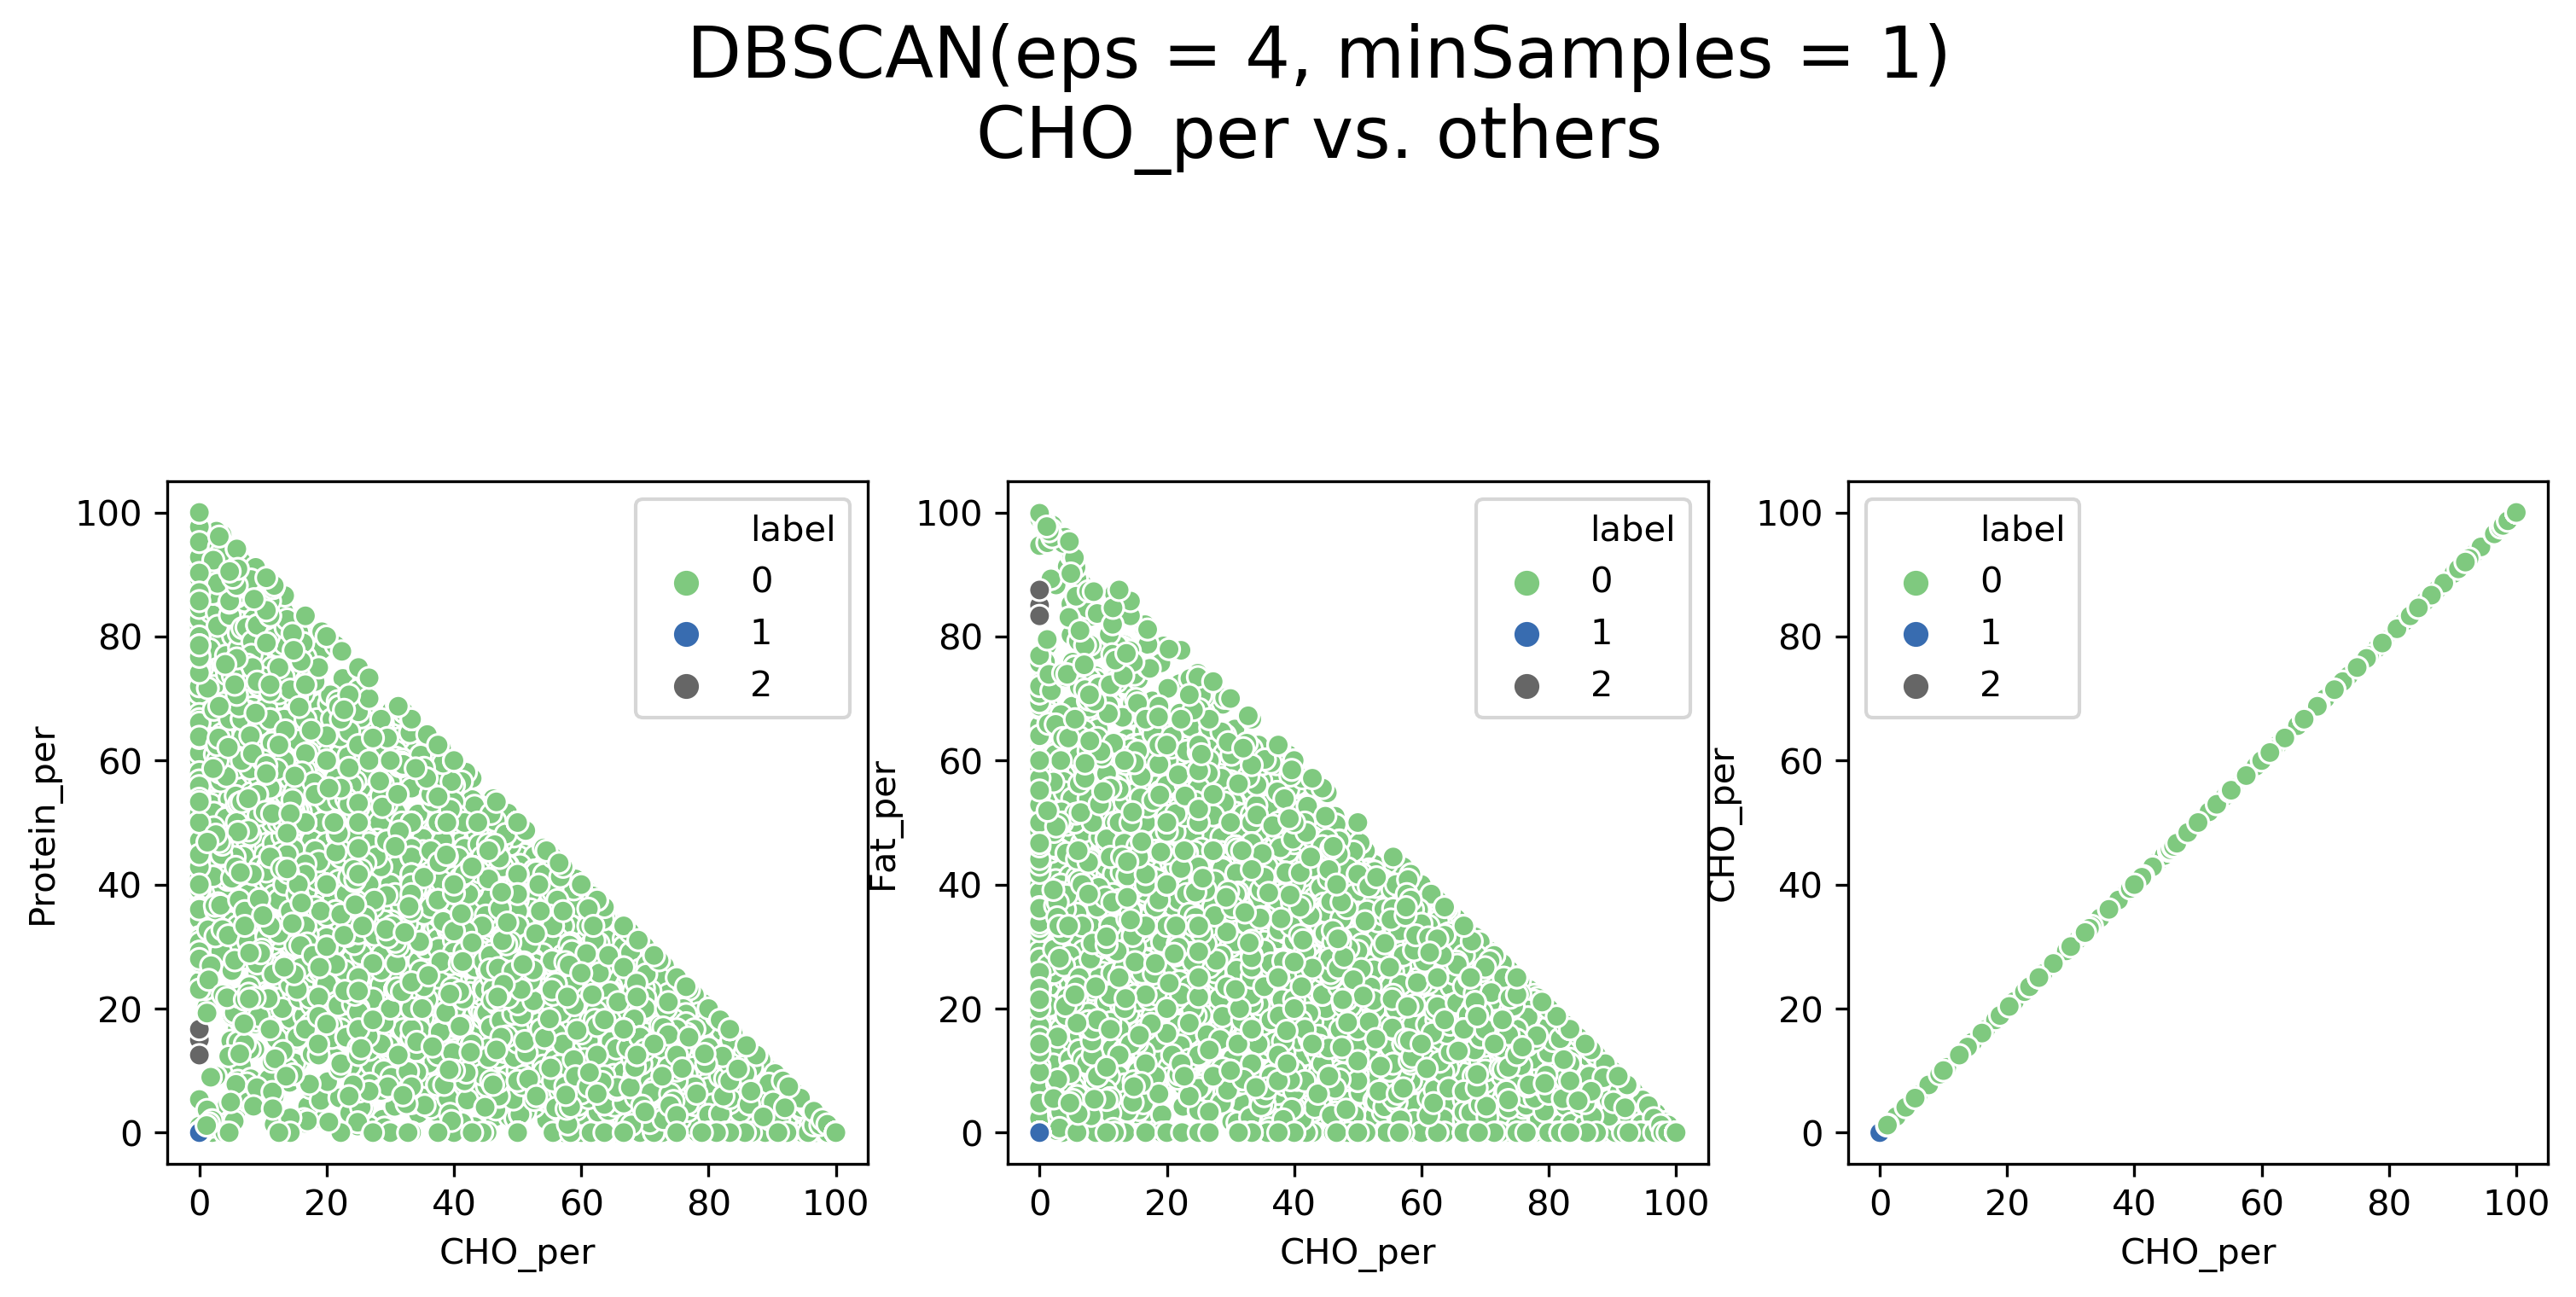

In [16]:
##CHO_per vs. others

title = 'CHO_per' 

a = "Protein_per"
b = "Fat_per"
c = "CHO_per"

# 制訂畫布
plt.figure(num=None, figsize=(12, 12), dpi=300, facecolor='w', edgecolor='k')

# 制訂畫布抬頭
plt.suptitle('DBSCAN(' + DBSN +")" + ('\n') + title + ' vs. others', ha = 'center', va = 'bottom',
                 fontsize=20)

# 子圖
plt.subplot(3,3,1)
sns.scatterplot(x=dfi[title],
                y=dfi[a],
                hue=dfi["label"], palette="Accent")
 
plt.subplot(3,3,2)
sns.scatterplot(x=dfi[title],
                y=dfi[b],
                hue=dfi["label"], palette="Accent")
 
plt.subplot(3,3,3)
sns.scatterplot(x=dfi[title],
                y=dfi[c],
                hue=dfi["label"], palette="Accent")

# 儲存圖片
plt.savefig(path + Stand + '_' +  DBSN +  '_' + str(param)+'param' + '_' + str(title) + 'VsOthers' +'.png', dpi=300, bbox_inches = 'tight')
plt.show()

### 結論：本分群效果不佳